In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbs
from pandas import Series, DataFrame
%matplotlib inline 

In [2]:
titanic_df = pd.read_csv('F:\\Libraries\\Documents\\Phyton project\\udemy\\train.csv')

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


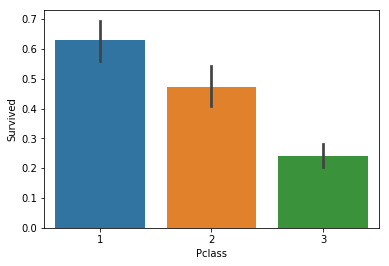

In [5]:
sbs.barplot('Pclass','Survived', data=titanic_df)

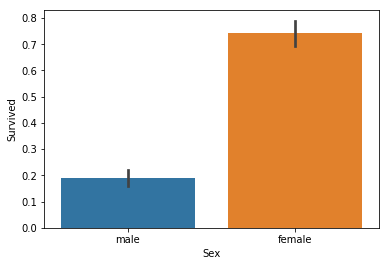

In [6]:
sbs.barplot('Sex','Survived', data=titanic_df)
#sbs.barplot('Sex', data=titanic_df)

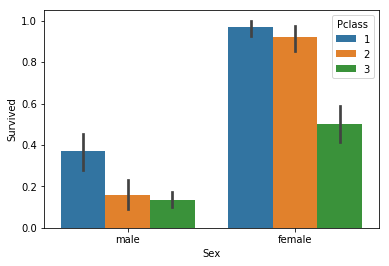

In [7]:
sbs.barplot('Sex','Survived', data=titanic_df, hue = 'Pclass')

In [8]:
#np.array('Sex")
unique, counts = np.unique(np.array(titanic_df["Sex"]), return_counts=True)
sex_tbl=dict(zip(unique, counts))
sex_tbl

{'female': 314, 'male': 577}

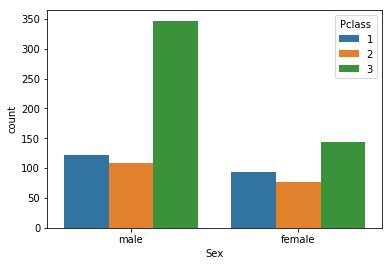

In [9]:
sbs.countplot('Sex',data=titanic_df, hue = 'Pclass')

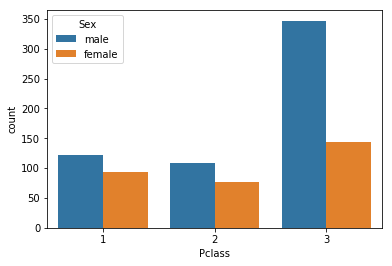

In [10]:
sbs.countplot('Pclass',data=titanic_df, hue = 'Sex')

In [11]:
#sbs.catplot("Sex",  'Pclass', data=titanic_df)

In [12]:
def man_woman_child(passenger):
    age, sex = passenger
    if age <16:
        return "child"
    else:
        return sex
    

In [13]:
titanic_df['Person']= titanic_df[["Age","Sex"]].apply(man_woman_child, axis=1)

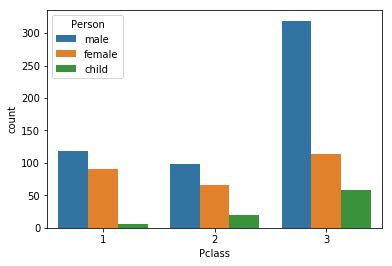

In [14]:
sbs.countplot("Pclass", data=titanic_df, hue= "Person")

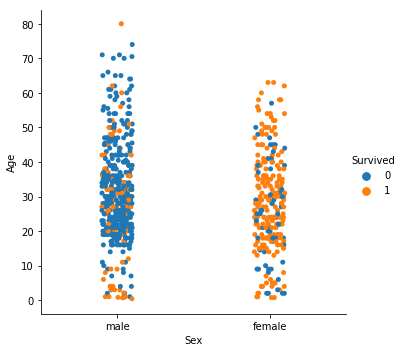

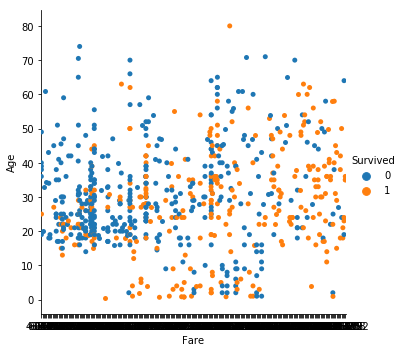

In [15]:
sbs.catplot("Sex",'Age', hue = 'Survived', data=titanic_df)
sbs.catplot("Fare",'Age', hue = 'Survived', data=titanic_df)

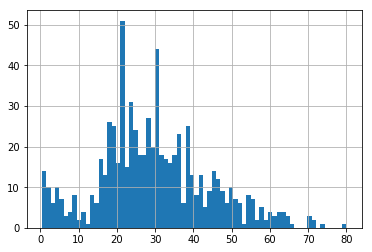

In [16]:
titanic_df["Age"].hist(bins= 70)

In [17]:
titanic_df["person"]

KeyError: 'person'

In [ ]:
#titanic_df.set_index("Sex").count("Sex")

In [ ]:
#titanic_df.count("Sex")
#a=np.array("Sex")

In [ ]:
sbs.catplot("Fare",'Age', hue = 'Sex', data=titanic_df)

In [ ]:
# idea hist by class


In [ ]:
fig = sbs.FacetGrid(titanic_df, hue= "Pclass", aspect= 4)
fig.map(sbs.kdeplot,"Age", shade=True)
oldest = titanic_df["Age"].max()
fig.set(xlim =(0,oldest))
fig.add_legend()

In [ ]:
fig = sbs.FacetGrid(titanic_df, hue= "Sex", aspect= 4)
fig.map(sbs.kdeplot,"Age", shade=True)
oldest = titanic_df["Age"].max()
fig.set(xlim =(0,oldest))
fig.add_legend()

In [116]:
deck = titanic_df["Cabin"].dropna()

In [125]:
deck.head


<bound method NDFrame.head of 1              C85
3             C123
6              E46
10              G6
11            C103
21             D56
23              A6
27     C23 C25 C27
31             B78
52             D33
54             B30
55             C52
61             B28
62             C83
66             F33
75           F G73
88     C23 C25 C27
92             E31
96              A5
97         D10 D12
102            D26
110           C110
118        B58 B60
123           E101
124            D26
128          F E69
136            D47
137           C123
139            B86
148             F2
          ...     
751           E121
759            B77
763        B96 B98
765            D11
772            E77
776            F38
779             B3
781            B20
782             D6
789        B82 B84
796            D17
802        B96 B98
806            A36
809             E8
815           B102
820            B69
823           E121
829            B28
835            E49
839            C47
8

In [123]:
levels= [lvl[:1] for lvl in deck]
levels

['C',
 'C',
 'E',
 'G',
 'C',
 'D',
 'A',
 'C',
 'B',
 'D',
 'B',
 'C',
 'B',
 'C',
 'F',
 'F',
 'C',
 'E',
 'A',
 'D',
 'D',
 'C',
 'B',
 'E',
 'D',
 'F',
 'D',
 'C',
 'B',
 'F',
 'C',
 'E',
 'B',
 'A',
 'C',
 'F',
 'A',
 'F',
 'B',
 'B',
 'G',
 'A',
 'D',
 'D',
 'C',
 'C',
 'C',
 'D',
 'G',
 'C',
 'B',
 'E',
 'B',
 'C',
 'C',
 'C',
 'D',
 'A',
 'B',
 'D',
 'C',
 'C',
 'B',
 'E',
 'C',
 'C',
 'E',
 'C',
 'B',
 'C',
 'E',
 'C',
 'D',
 'B',
 'C',
 'C',
 'C',
 'E',
 'T',
 'F',
 'C',
 'F',
 'C',
 'E',
 'D',
 'B',
 'E',
 'C',
 'B',
 'D',
 'G',
 'C',
 'E',
 'C',
 'E',
 'B',
 'C',
 'A',
 'C',
 'C',
 'C',
 'E',
 'D',
 'E',
 'E',
 'D',
 'A',
 'B',
 'C',
 'B',
 'C',
 'D',
 'C',
 'B',
 'C',
 'E',
 'D',
 'F',
 'B',
 'B',
 'C',
 'B',
 'B',
 'B',
 'C',
 'C',
 'A',
 'E',
 'C',
 'E',
 'E',
 'C',
 'A',
 'E',
 'B',
 'D',
 'A',
 'C',
 'F',
 'D',
 'D',
 'D',
 'A',
 'B',
 'B',
 'D',
 'A',
 'D',
 'E',
 'C',
 'B',
 'B',
 'D',
 'B',
 'B',
 'C',
 'F',
 'C',
 'E',
 'E',
 'C',
 'C',
 'C',
 'F',
 'C',
 'E',
 'E'

,Cabin_letter
Index,
0,C
1,C
2,E
3,G
4,C
5,D
6,A
7,C
8,B


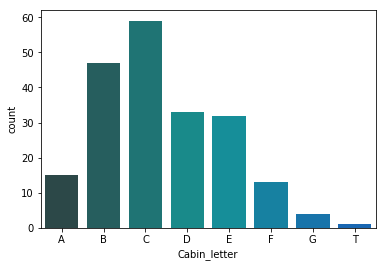

In [140]:
cabin_df = pd.DataFrame(levels)
cabin_df.columns = ["Cabin_letter"]
cabin_df.index.name = 'Index'
sbs.countplot("Cabin_letter", data=cabin_df.sort_values(["Cabin_letter"]), palette="winter_d")    # order= [A,B,C,D,E,F,G,T])
#cabin_df.head()result = df.sort(['A', 'B'],
cabin_df

In [ ]:
cabin_df2= cabin_df[cabin_df.Cabin !="T"]
#cabin_df = pd.DataFrame(levels)
#cabin_df.columns = ["Cabin"]
sbs.countplot("Cabin", data=cabin_df2.sort_values(["Cabin"]), palette="spring")      

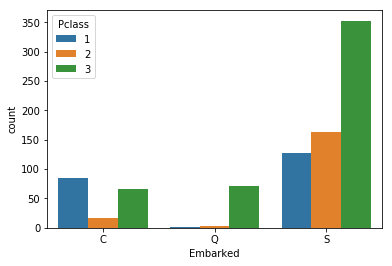

In [152]:
sbs.countplot("Embarked", data =titanic_df, hue= "Pclass", order= ["C","Q","S"] )

In [ ]:
titanic_df.head()


In [ ]:
titanic_df['Alone'] =titanic_df.SibSp + titanic_df.Parch

In [ ]:
titanic_df['Alone']

In [ ]:
titanic_df['Alone'].loc[titanic_df['Alone']>0] = "With Family"
titanic_df['Alone'].loc[titanic_df['Alone']==0] = "Alone"

In [128]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Cabin_level
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,C85
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,C123
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,NaN


In [ ]:
sbs.countplot('Alone', data= titanic_df, palette = "Blues")

In [129]:
titanic_df['Survivor'] = titanic_df.Survived.map({0:"No" ,1:'Yes'})
titanic_df.head()
titanic_df.index.name = "index_M"

In [18]:
sbs.countplot('Survivor', data= titanic_df)

ValueError: Could not interpret input 'Survivor'

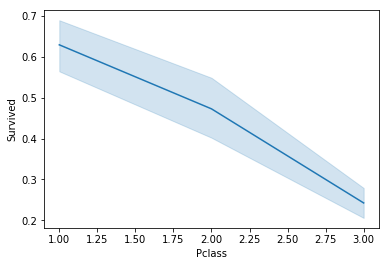

In [19]:
sbs.lineplot("Pclass", "Survived", data= titanic_df ) #, hue= "Sex")

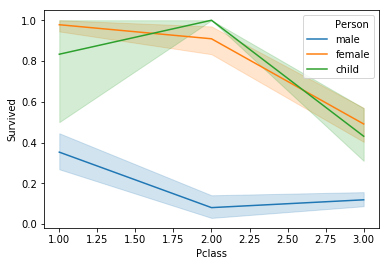

In [20]:
sbs.lineplot("Pclass", "Survived", data= titanic_df, hue= "Person" )

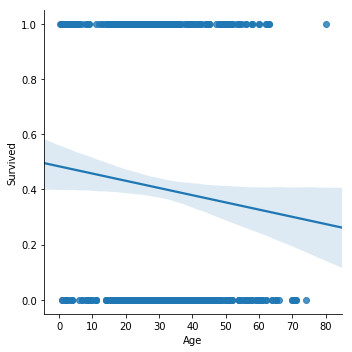

In [21]:
sbs.lmplot('Age', "Survived", data=  titanic_df )

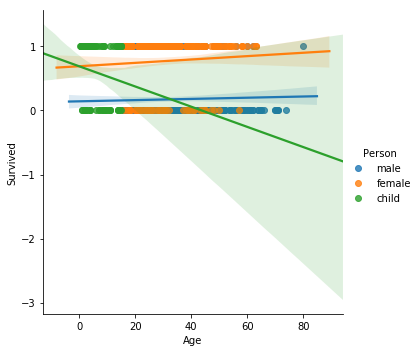

In [22]:
sbs.lmplot('Age', "Survived", data=  titanic_df , hue = 'Person')

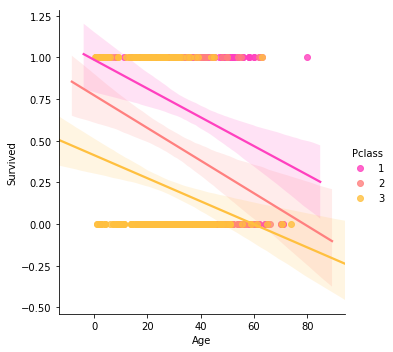

In [23]:
sbs.lmplot('Age', "Survived", data=  titanic_df, hue ='Pclass', palette= "spring")

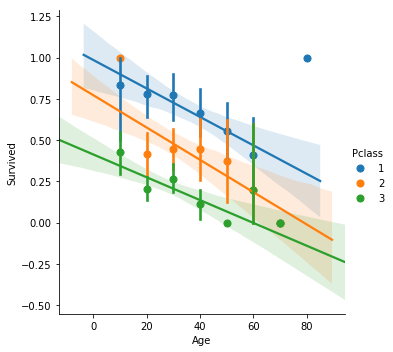

In [24]:
Generations = [10,20,30,40,50,60,70,80]
sbs.lmplot('Age', "Survived", hue= "Pclass", data= titanic_df, x_bins= Generations)

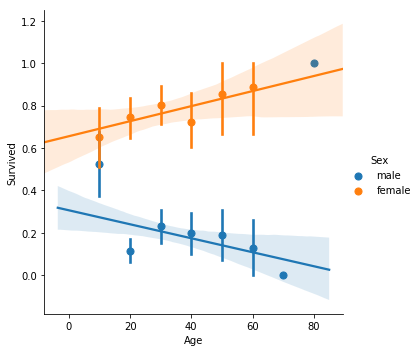

In [25]:
Generations = [10,20,30,40,50,60,70,80]
sbs.lmplot('Age', "Survived", hue= "Sex", data= titanic_df, x_bins= Generations)

In [26]:
#Generations = [10,20,30,40,50,60,70,80]
sbs.lmplot("deck", "Survived", hue= "Pclass", data= titanic_df)

KeyError: "['deck'] not in index"

In [131]:
# CAbin VS suervival 
titanic_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Cabin_level,Survivor
index_M,,,,,,,,,,,,,,,
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,NaN,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,C85,Yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,NaN,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,C123,Yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,NaN,No


In [47]:
titanic_df['Cabin_level'] = titanic_df.loc[:,'Cabin'][0:]

In [110]:
def cabinlvl(df):
    for index,row in df.iterrows():
    #print( str(row["Cabin"])[:1])
        letter =str(row["Cabin"])[:1]
        return letter #letter.upper()
print(cabinlvl(titanic_df))

n


In [142]:
titanic_df2 = pd.concat([titanic_df, cabin_df], axis=1, join_axes=[titanic_df.index])
#titanic_df2= titanic_df.applymap( )

In [143]:
titanic_df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Cabin_level,Survivor,Cabin_letter
index_M,,,,,,,,,,,,,,,,
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,NaN,No,C
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,C85,Yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,NaN,Yes,E
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,C123,Yes,G
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,NaN,No,C


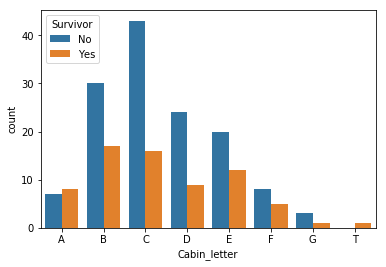

In [155]:
sbs.countplot("Cabin_letter", hue="Survivor",  data= titanic_df2, order= ["A", "B","C","D","E","F", "G", "T"])